In [138]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import explained_variance_score
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [139]:
# area = pd.read_csv("wi_land_area.csv")

In [140]:
# area = area.iloc[:,[0,23]] #most current measurement
# area = area.iloc[3102:3174,:]
# area = area.rename(columns={"Areaname": "name", "LND110210D": "area"}) 

# area['name'] = area['name'].str[:-4] #strip to just county name
# area = area.set_index('name')

In [141]:
# df = pd.read_csv("final_data_old");

# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)

In [142]:
# df = df.join(area, on = 'name')
# del df['Unnamed: 0']
# df['pop density'] = df['population']/df['area']
# del df['area']

In [143]:
# df.to_csv('final_data', index=False)


In [144]:
df = pd.read_csv("final_data.csv");
df = df.drop(0)
df

,name,positive,negative,deaths,total tests,percent positive,percent deaths,geometry,population,percent pop pos,percent pop tested,percent pop dead,pop density
1,Brown,455.0,1499.0,2.0,1954,23.285568,0.438596,MULTIPOLYGON (((-88.2501192432117 44.679782277...,263378,0.172756,0.741899,0.000759,497.211682
2,Dane,387.0,7581.0,21.0,7968,4.856928,5.412371,"POLYGON ((-89.0091453050261 43.2848380086325, ...",542364,0.071354,1.469124,0.003872,453.011927
3,Kenosha,294.0,1588.0,6.0,1882,15.621679,2.033898,MULTIPOLYGON (((-88.08397896563579 42.66991396...,169290,0.173666,1.111702,0.003544,622.412589
4,Waukesha,280.0,2944.0,14.0,3224,8.684864,4.982206,"POLYGON ((-88.4179931201656 43.1947050295068, ...",403072,0.069466,0.799857,0.003473,733.431592
5,Racine,215.0,1592.0,10.0,1807,11.898174,4.629630,"POLYGON ((-87.8263041676683 42.8422370717163, ...",196584,0.109368,0.919200,0.005087,591.230075
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,Langlade,0.0,78.0,0.0,78,0.000000,0.000000,"POLYGON ((-89.046496579905 45.4644473488926, -...",19268,0.000000,0.404816,0.000000,22.130846
68,Lincoln,0.0,147.0,0.0,147,0.000000,0.000000,"POLYGON ((-89.42483069372349 45.4671743249934,...",27689,0.000000,0.530897,0.000000,31.501644
69,Pepin,0.0,96.0,0.0,96,0.000000,0.000000,"POLYGON ((-91.6503682463528 44.6836410605132, ...",7289,0.000000,1.317053,0.000000,31.420812
70,Taylor,0.0,79.0,0.0,79,0.000000,0.000000,"POLYGON ((-90.04227986736051 45.3818742718075,...",20412,0.000000,0.387027,0.000000,20.937962


In [145]:
matplotlib.rcParams["font.size"] = 12

def get_ax():
    ax = plt.subplot()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    return ax

In [146]:
df = df[df['positive'] > 2] #Limiting to counties where community spread is more likely

In [147]:
train, test = train_test_split(df, test_size=0.3)

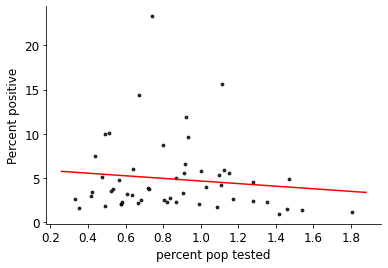

In [148]:
X_train = df[["percent pop tested"]].values.reshape(-1,1)
y_train = df[["percent positive"]].values.reshape(-1,1)

r = LR()
r.fit(X_train, y_train)

slope = r.coef_[0]
intercept = r.intercept_

ax = get_ax()
df.plot.scatter(ax = ax, x = "percent pop tested", y = "percent positive", s = 8, color = 'black', alpha = .8)
ax.set_ylabel("Percent positive")
y0 = ax.get_xlim()[0] * slope + intercept
y1 = ax.get_xlim()[1] * slope + intercept
plt.plot(ax.get_xlim(),[y0,y1], color = 'red')
# ax.set_xlim(-7)
# ax.set_ylim(0)

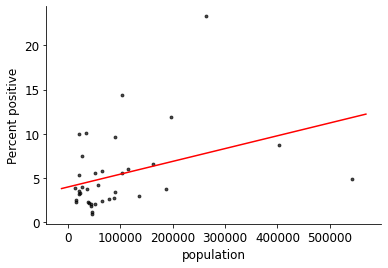

In [149]:
X_train = train[["population"]].values.reshape(-1,1)
y_train = train[["percent positive"]].values.reshape(-1,1)

r.fit(X_train, y_train)

slope = r.coef_[0]
intercept = r.intercept_

ax = get_ax()
train.plot.scatter(ax = ax, x = "population", y = "percent positive", s = 8, color = 'black', alpha = .7)
ax.set_ylabel("Percent positive")
y0 = ax.get_xlim()[0] * slope + intercept
y1 = ax.get_xlim()[1] * slope + intercept
plt.plot(ax.get_xlim(),[y0,y1], color = 'red')


In [150]:
X_test = test[["population"]].values.reshape(-1,1)
y_test = test[["percent positive"]].values.reshape(-1,1)

y_pred_train = r.predict(X_train)
y_pred_test = r.predict(X_test)

explained_variance_score(y_train, y_pred_train), explained_variance_score(y_test, y_pred_test) 

(0.132450845420784, 0.187789578823787)

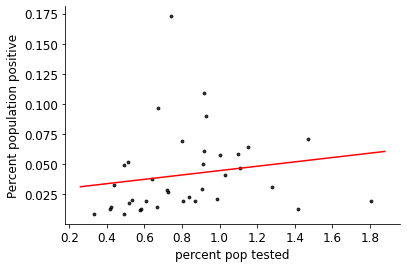

In [151]:
X_train = train[["percent pop tested"]].values.reshape(-1,1)
y_train = train[["percent pop pos"]].values.reshape(-1,1)

r.fit(X_train, y_train)

slope = r.coef_[0]
intercept = r.intercept_

ax = get_ax()
train.plot.scatter(ax = ax, x = "percent pop tested", y = "percent pop pos", s = 8, color = 'black', alpha = .8)
ax.set_ylabel("Percent population positive")
y0 = ax.get_xlim()[0] * slope + intercept
y1 = ax.get_xlim()[1] * slope + intercept
plt.plot(ax.get_xlim(),[y0,y1], color = 'red')

In [152]:
X_test = test[["percent pop tested"]].values.reshape(-1,1)
y_test = test[["percent pop pos"]].values.reshape(-1,1)

y_pred_train = r.predict(X_train)
y_pred_test = r.predict(X_test)

explained_variance_score(y_train, y_pred_train), explained_variance_score(y_test, y_pred_test) 

(0.03001125838073815, 0.06458198718440344)

In [153]:
#outliers are densely populated cities like Milwaukee
slope

array([0.01806474])

array([0.00013173])

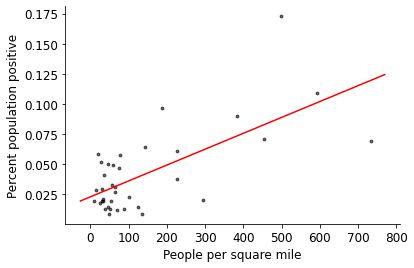

In [157]:
X_train = train[["pop density"]].values.reshape(-1,1)
y_train = train[["percent pop pos"]].values.reshape(-1,1)

r.fit(X_train, y_train)

slope = r.coef_[0]
intercept = r.intercept_

ax = get_ax()
train.plot.scatter(ax = ax, x = "pop density", y = "percent pop pos", s = 8, color = 'black', alpha = .6)
ax.set_ylabel("Percent population positive")
ax.set_xlabel("People per square mile")
y0 = ax.get_xlim()[0] * slope + intercept
y1 = ax.get_xlim()[1] * slope + intercept
plt.plot(ax.get_xlim(),[y0,y1], color = 'red')
# ax.get_figure().savefig("regression1.svg", bbox_inches="tight")
slope

In [155]:
#line is best fit for population density and percent population positive
X_test = test[["pop density"]].values.reshape(-1,1)
y_test = test[["percent pop pos"]].values.reshape(-1,1)

y_pred_train = r.predict(X_train)
y_pred_test = r.predict(X_test)

explained_variance_score(y_train, y_pred_train), explained_variance_score(y_test, y_pred_test) 

(0.45872872141524346, 0.5200418155206599)

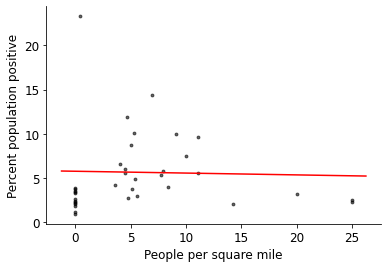

In [156]:
#trivial exmaple?
X_train = train[["percent positive"]].values.reshape(-1,1)
y_train = train[["percent deaths"]].values.reshape(-1,1)

r.fit(X_train, y_train)

slope = r.coef_[0]
intercept = r.intercept_

ax = get_ax()
train.plot.scatter(ax = ax, x = "percent deaths", y = "percent positive", s = 8, color = 'black', alpha = .6)
ax.set_ylabel("Percent population positive")
ax.set_xlabel("People per square mile")
y0 = ax.get_xlim()[0] * slope + intercept
y1 = ax.get_xlim()[1] * slope + intercept
plt.plot(ax.get_xlim(),[y0,y1], color = 'red')